# RRTM Mid-Latitude Summer (MLS) standard atmosphere

## This notebook reads in the MLS standard atmosphere, then allows the user to scale the profiles for each of the seven gases (H2O, CO2, O3, N2O, CO, CH4, and O2).  It is also possible to scale the profiles by a factor of zero to eliminate that gas from the RRTM calculation.  It also allows the user to specify aerosols or cloud properties.

<i>© Von P. Walden, Washington State University</i>

In [24]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### STEP 1) DECISIONS REGARDING MODEL ATMOSPHERE.

In [31]:
# ......................................................................
# Create a unique file extension for your input and output files (e.g., '2xCO2')
fileExt     = 'mls_sw' 

# ......................................................................
# Shortwave (sw) or longwave (lw) calculation?
type = 'sw'        # Choose either 'sw' or 'lw'.
aer  = 'n'         # Choose either 'n' or 'y'.
cld  = 'n'         # Currently one must choose either aerosols OR clouds, but not both.

# ......................................................................
# Solar zenith angle
day  = 31+28+21
sza  = 45.0

# ......................................................................
# Scalings for the atmospheric gases?   (Set all to 1.0 for NO SCALING.)
h2o_scale = 1.0
co2_scale = 1.0
o3_scale  = 1.0
n2o_scale = 1.0
co_scale  = 1.0
ch4_scale = 1.0
o2_scale  = 1.0

# ......................................................................
# Include aerosols?   (If 'y', then you must specify information for the IN_AER_RRTM file below.)
if aer=='y':
    aerFilename = '/home/hub-vonw/Short Course on Atmospheric Radiative Transfer/content/rrtm/IN_AER_RRTM'
    fa = open(aerFilename,'w')
    fa.write('    1\n')
    fa.write('    4    0    0    0   2.184    1.00    0.00\n')  # Last 3 values specify the wavelength dependence; see next cell.
    fa.write('    1 0.0013\n')                                  # Layer 1, Aerosol optical depth at 1 micron
    fa.write('    2 0.0037\n')                                  # Layer 2, Aerosol optical depth at 1 micron
    fa.write('    3 0.0037\n')                                  # Layer 3, Aerosol optical depth at 1 micron
    fa.write('    4 0.0037\n')                                  # Layer 4, Aerosol optical depth at 1 micron
    fa.write('0.75\n')                                          # Single scattering albedo
    fa.write('0.700\n')                                         # Asymmetry factor (g)
    fa.close()

# ......................................................................
# Include clouds?     (If 'y', then you must specify information for the IN_CLD_RRTM file below.)
if cld=='y':
    cldFilename = '/home/hub-vonw/Short Course on Atmospheric Radiative Transfer/content/rrtm/IN_CLD_RRTM'
    fc = open(cldFilename,'w')
    fc.write('    2    3    1\n')                                           # Standard specification for both sw and lw.
    fc.write('   11       1.0     6.515       0.5      65.0      10.0\n')   # LAY, CLDFRAC, CWP, FRACICE, EFFSIZEICE, EFFSIZELIQ
    fc.write('%\n')
    fc.close()


### STEP 2) READ THE MODEL ATMOSPHERE.

In [32]:
# Read model atmosphere, two lines at a time.
data = loadtxt('/home/hub-vonw/Short Course on Atmospheric Radiative Transfer/content/rrtm/mls.dat')
nalt = len(data)

# Extract the profile data.
Z    = data[:,1]
P    = data[:,2]
T    = data[:,3]

h2o  = data[:,6]
co2  = data[:,7]
o3   = data[:,8]
n2o  = data[:,9]
co   = data[:,10]
ch4  = data[:,11]
o2   = data[:,12]

# Units for the different profiles.
un1  = 'AA'
un2  = 'AAAAAAA'

### STEP 3) APPLY THE SCALE FACTORS FOR EACH OF THE SEVEN GASES.

In [33]:
# Apply the scale factors.
h2o       = h2o * h2o_scale
co2       = co2 * co2_scale
o3        = o3  * o3_scale
n2o       = n2o * n2o_scale
co        = co  * co_scale
ch4       = ch4 * ch4_scale
o2        = o2  * o2_scale

### STEP 4) CREATE A NEW MODEL ATMOSPHERE (INPUT_RRTM).

In [35]:
# Create A NEW text file.

# NOTE: Any existing input file is deleted !!
!rm INPUT_RRTM

# Create new input file.
newFilename = 'INPUT_RRTM'
fn = open(newFilename,'w')

if type=='sw':
    fn.write('INPUT_RRTM_SW FOR MLS ATMOSPHERE\n')
    fn.write('0        1         2         3         4         5         6         7         8         9\n')
    fn.write('123456789-123456789-123456789-123456789-123456789-123456789-123456789-123456789-123456789-\n')
    fn.write('$ MID-LATITUDE SUMMER ATMOSPHERE\n')
    if aer=='y':
        fn.write('                   0                             1                                0 1   00    0   10\n')
    elif cld=='y':
        fn.write('                   0                             1                                0 1   00    1   10\n')        
    else:
        fn.write('                   0                             1                                0 1   00    0   10\n')
#        fn.write('                   0                             1                                0 1   98    0   10\n')
    fn.write('%15d%10.3f\n' % (day, sza))
    fn.write('           2  00.8810.7940.7380.7270.6570.6600.6260.6550.7910.8830.9570.9580.9580.970\n')
    fn.write('    0        38         0    7    0    0     0.000     0.000    45.000\n')
    fn.write('     0.000    60.000\n')
    fn.write('     0.000     1.000     2.000     3.000     4.000     5.000     6.000     7.000\n')
    fn.write('     8.000     9.000    10.000    11.000    12.000    13.000    14.000    15.000\n')
    fn.write('    16.000    17.000    18.000    19.000    20.000    21.000    22.000    23.000\n')
    fn.write('    24.000    25.000    27.500    30.000    32.500    35.000    37.500    40.000\n')
    fn.write('    42.500    45.000    47.500    50.000    55.000    60.000\n')
    fn.write('   38 Mid-latitude Summer Atmosphere\n')
else:
    fn.write('INPUT_RRTM_LW FOR MLS ATMOSPHERE\n')
    fn.write('0        1         2         3         4         5         6         7         8         9\n')
    fn.write('123456789-123456789-123456789-123456789-123456789-123456789-123456789-123456789-123456789-\n')
    fn.write('$ MID-LATITUDE SUMMER ATMOSPHERE\n')
    if cld=='n':
        fn.write('                                                 1                   0            0 0    0    0\n')
    else:
        fn.write('                                                 1                   0            2 0    0    1\n')
    fn.write(' 294.2\n')
    fn.write('    0        38         0    7    0    0     0.000                         0.000\n')
    fn.write('     0.000    60.000\n')
    fn.write('     0.000     1.000     2.000     3.000     4.000     5.000     6.000     7.000\n')
    fn.write('     8.000     9.000    10.000    11.000    12.000    13.000    14.000    15.000\n')
    fn.write('    16.000    17.000    18.000    19.000    20.000    21.000    22.000    23.000\n')
    fn.write('    24.000    25.000    27.500    30.000    32.500    35.000    37.500    40.000\n')
    fn.write('    42.500    45.000    47.500    50.000    55.000    60.000\n')
    fn.write('   38 Mid-latitude Summer Atmosphere\n')

# Write the NEW model atmosphere.
# ....Remaining lines in pairs
for alt in range(nalt):
    fn.write('%10.3f%10.3f%10.3f     %2s   %7s\n' % (Z[alt], P[alt], T[alt], un1, un2))
    fn.write('%10.3E%10.3E%10.3E%10.3E%10.3E%10.3E%10.3E\n' % (h2o[alt], co2[alt], o3[alt], n2o[alt], co[alt], ch4[alt], o2[alt]))

# End of input file.
fn.write('%%%%%')

fn.close()

# Save the input file using the desired extension.
fileExt = '.' + fileExt
!cp INPUT_RRTM INPUT_RRTM$fileExt

In [36]:
# Link to the executable file, RRTM
!ln -s /opt/rrtm/rrtm_lw/rrtm_v3.3_linux_gfortran rrtm_lw
!ln -s /opt/rrtm/rrtm_sw/rrtm_sw_linux_gfortran_v2.5 rrtm_sw

!./rrtm_sw

ln: failed to create symbolic link ‘rrtm_lw’: File exists
ln: failed to create symbolic link ‘rrtm_sw’: File exists


### STEP 5) RUN RRTM

In [23]:
# Link to the executable file, RRTM
!ln -s /opt/rrtm/rrtm_lw/rrtm_v3.3_linux_gfortran rrtm_lw
!ln -s /opt/rrtm/rrtm_sw/rrtm_sw_linux_gfortran_v2.5 rrtm_sw

# Run the appropriate program and pre-process the output file.
if type=='sw':
    !./rrtm_sw
    !tail -n+6 OUTPUT_RRTM | head -n-17 > OUTPUT_RRTM$fileExt
else:
    !./rrtm_lw
    !tail -n+4 OUTPUT_RRTM | head -n-21 > OUTPUT_RRTM$fileExt


ln: failed to create symbolic link ‘rrtm_lw’: File exists
ln: failed to create symbolic link ‘rrtm_sw’: File exists


### STEP 6) QUICK PLOT OF THE RESULTS

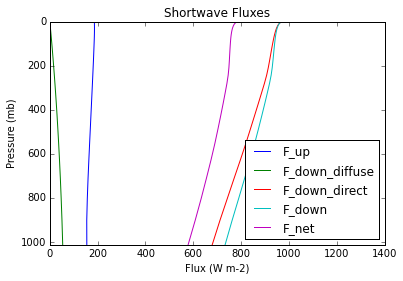

In [14]:
# Read in the output file and graph the data.
out   = loadtxt('OUTPUT_RRTM' + fileExt)

if type=='sw':
    p     = out[:,1]
    Fu    = out[:,2]
    Fd_df = out[:,3]
    Fd_dr = out[:,4]
    Fd    = out[:,5]
    Fnet  = out[:,6]
    hr    = out[:,7]
    
    plot(Fu,p,Fd_df,p,Fd_dr,p,Fd,p,Fnet,p)
    axis([0, 1400, 0, 1013])
    ax = gca()
    ax.set_ylim(ax.get_ylim()[::-1])
    xlabel('Flux (W m-2)')
    ylabel('Pressure (mb)')
    title('Shortwave Fluxes')
    legend(('F_up','F_down_diffuse','F_down_direct','F_down','F_net'),loc='best')
else:
    p     = out[:,1]
    Fu    = out[:,2]
    Fd    = out[:,3]
    Fnet  = out[:,4]
    hr    = out[:,5]
    
    plot(Fu,p,Fd,p,Fnet,p)
    axis([0, 700, 0, 1013])
    ax = gca()
    ax.set_ylim(ax.get_ylim()[::-1])
    xlabel('Flux (W m-2)')
    ylabel('Pressure (mb)')
    title('Longwave Fluxes')
    legend(('F_up','F_down','F_net'),loc='best')


## OTHER IMPORTANT INFORMATION

### DESCRIPTION OF THE SURFACE REFLECTIVITY

In [ ]:
v = array([(3250-2600)/2.+2600, (4000-3250)/2.+3250, (4650-4000)/2.+4000, (5150-4600)/2.+4600, (6150-5150)/2.+5150, (7700.-6150)/2.+6150, (8050-7700)/2.+7700, (12850-8050)/2.+8050, (16000-12850)/2.+12850, (22650-16000)/2.+16000, (29000.-22650)/2.+22650, (38000-29000)/2.+29000, (50000-38000)/2.+38000, (2600-800)/2.+800])
e = array([0.881, 0.794, 0.738, 0.727, 0.657, 0.660, 0.626, 0.655, 0.791, 0.883, 0.957, 0.958, 0.958, 0.970])
figure()
plot(10000./v,1-e,'o')
xlabel('Wavelength (um)')
ylabel('Reflectivity')
title('Reflectivity specified for the MLS atmosphere')


### DESCRIPTION OF THE SPECTRAL DEPENDENCE OF THE AEROSOL OPTICAL DEPTH

In [ ]:
lmbda   = arange(0.,6.,0.1)
lmbda1  = 1.0
AERPAR1 = 2.184
AERPAR2 = 1.00
AERPAR3 = 0.00
AOD1    = 0.0013     # Example from layer 1.
AOD     = AOD1 * (AERPAR2 + AERPAR3 * (lmbda/lmbda1)) / ((AERPAR2 + AERPAR3 - 1) + (lmbda/lmbda1)**AERPAR1)

figure()
semilogy(lmbda,AOD)
xlabel('Wavelength (um)')
ylabel('Aerosol Optical Depth')
title('Spectral Dependence of the Aerosol Optical Depth')


In [21]:
1374*cos(44.78*pi/180)

975.28808677533152